# Convalution examples

In [29]:
import numpy as np 

array = np.array([1.0, 2.0, 3.0])
print(array)

filter_1 = np.array([2])


[1. 2. 3.]


Let's try to see convolution in 1D with a scalar. The scalar needs to slide over each element of the array.

In [30]:
output = [np.sum(array[i:i+len(filter_1)] * filter_1) for i in range(len(array) - len(filter_1) + 1)]
print(output)

[np.float64(2.0), np.float64(4.0), np.float64(6.0)]


Let's now see the convolution performed between two arrays."

In [ ]:
import numpy as np

array = np.array([1., 2., 3., 4., 5.])
filter_1 = np.array([2., 6., 8.])

# Draw for this result array.shape[0] - filter_1.shape[0] + 1) and find the pattern

output = np.array([array[i:i+filter_1.shape[0]] for i in range(array.shape[0] - filter_1.shape[0] + 1)])

output = np.sum(output * filter_1, axis = 1)
print(output)

[38. 54. 70.]


In [ ]:
import numpy as np

array = np.array([1., 2., 3., 4., 5.])
filter_1 = np.array([2., 6., 8.])

output = np.zeros(array.shape[0] - filter_1.shape[0] + 1)
for i in range(len(output)):
    region = array[i:i+len(filter_1)]
    output[i] = np.sum(region * filter_1)

print(output)  # [38. 54. 70.]


[38. 54. 70.]


Let's see the convolution between an array and a matrix.

In [ ]:
import numpy as np 

array = np.array([[1., 2., 3., 4., 5.],[6. ,7., 8., 9., 10.]]) # to keep the element wise operation
print(array.shape)
filter_1 = np.array([2., 6., 8.])
print(filter_1.shape)
output_shape = (array.shape[0], array.shape[1] - filter_1.shape[0] + 1)
output = np.zeros(output_shape)

for i in range(array.shape[0]):
    for j in range(array.shape[1] - filter_1.shape[0] + 1 ):
        region = array[i, j:j + filter_1.shape[0]]
        output[i,j] = np.sum(region * filter_1)
print(output)


(2, 5)
(3,)
[1. 2. 3.]
[2. 3. 4.]
[3. 4. 5.]
[6. 7. 8.]
[7. 8. 9.]
[ 8.  9. 10.]
[[ 38.  54.  70.]
 [118. 134. 150.]]


Let's see the convolution between two matrices.

In [32]:
import numpy as np 

array = np.array([[1., 2., 3., 4., 5.],[6. ,7., 8., 9., 10.]]) # to keep the element wise operation
print(array.shape)
filter_1 = np.array([[2., 6., 8.],[2., 6., 8.]])
print(filter_1.shape)
output_shape = (array.shape[0] - filter_1.shape[0] + 1, array.shape[1] - filter_1.shape[1] + 1)
output = np.zeros(output_shape)

for i in range(array.shape[0] - filter_1.shape[0] + 1): # On rows
    for j in range(array.shape[1] - filter_1.shape[1] + 1 ): # On columns
        region = array[i:i+ filter_1.shape[0], j:j + filter_1.shape[1]]
        output[i,j] = np.sum(region * filter_1)
print(output)

(2, 5)
(2, 3)
[[156. 188. 220.]]


# Performing convolution on images using NumPy and sklearn

In [32]:
from sklearn.datasets import fetch_openml

In [33]:
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.to_numpy()
y = mnist.target.to_numpy().astype('int')

In [34]:
print(X.shape) # nb_images, features 28*28

print(X[0,:])

(70000, 784)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0  

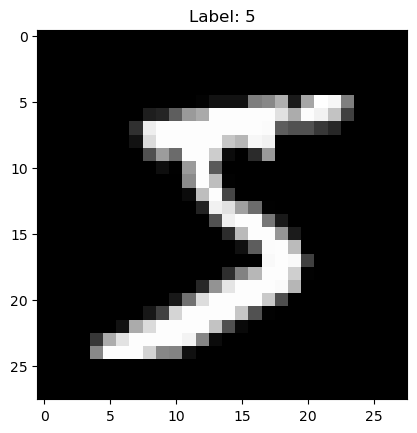

In [35]:
import matplotlib.pyplot as plt

plt.imshow(X[0, :].reshape(28, 28), cmap='gray')
plt.title(f"Label: {y[0]}")
plt.show()

In [36]:
import numpy as np
filter_blury = np.array([[1/16, 1/8, 1/16],[1/8, 1/4, 1/8],[1/16, 1/8, 1/16]])
image = np.reshape(X[0,:], (28,28))

output_shape = (image.shape[0] - filter_blury.shape[0] + 1, image.shape[1] - filter_blury.shape[1] + 1)

output = np.zeros(output_shape)

for i in range(output_shape[0]):
    for j in range(output_shape[1]):
        region = image[i:i+filter_blury.shape[0], j:j+filter_blury.shape[1]]
        output[i, j] = np.sum(region * filter_blury)
print(output)

[[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00]
 [0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00]
 [0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.

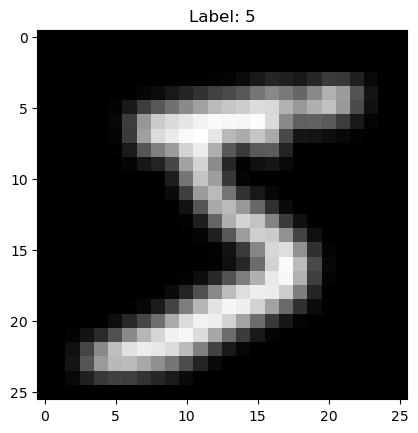

In [37]:
import matplotlib.pyplot as plt

plt.imshow(output, cmap='gray')
plt.title(f"Label: {y[0]}")
plt.show()